<a href="https://colab.research.google.com/github/mlgancena/ge120/blob/main/GANCE%C3%91A_ME6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME6 Last!

A lot contains bounding lines and corner points. Two points form a line wehn connected which also provides a measure of line length and direction. The legth of a line is defined by the distance between its endpoints. The direction is defined by the line's azimuth (from the South) - measured from the first point given(point occupied) to the second point provided(point observed).

1. printing a Point object will give the eastings and northings in the format eastings, northings
2. adding two point objects will create a line object
3. adding a line object will give the point object occupied, point object observed, length of line and azimuth
~~~
Point Occupied: eastings, northings
Point Observed: eastings, northings
Distance: length of line
Azimuth: azimuth of line
~~~
4. printing a lot object will give the lot lines details in the format
5. invoking the plot() method of te=he Lot object will result in an output plot with the format below

# Point Class

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
class Point:
  '''
  The Point object is given eastings and northings when initializing. This basically
  creates an object with coordinates that will be used for other classes

  Attributes
    eastings:  float, given thru parameter eastings
    northings: float, given thru parameter northings

  Methods
    getCoords() : gives a tuple of the eastings and northings
    setCoords(new_eastings, new_northings) : sets the new eastings and northings accordingly

  Magic Methods
    __str__(): returns the string of eastings and northings of a point
    __add__(obs_point): adds two Point objects to create a Line object
  '''
  def __init__(self, eastings, northings):
    '''
    initialize Point class

    Parameters
      eastings   : float, eastings of the point (assigned by user)
      northings  : float, northings of the point (assigned by user)

    '''
    self._eastings = eastings
    self._northings = northings

  def getCoords(self):
    '''
    gives a tuple of the eastings and northings

    Return
      coordtuple:  tuple, tuple of Point eastings and Point northings
    '''
    coordtuple = [self._eastings, self._northings]
    return coordtuple

  def setCoords(self, new_eastings, new_northings):
    '''
    sets the new eastings and northings accordingly

    Parameters
      new_eastings:  float, new eastings of the point (assigned by user)
      new_northings: float, new northings of the point (assigned by user)
    '''
    self._eastings = new_eastings
    self._northings = new_northings

  def __str__(self):
    '''
    print operation

    Return
      string of eastings and northings of a point
    '''
    return '{}, {}'.format(self._eastings, self._northings)

  def __add__(self, obs_point):
    '''
    add operation

    Return
      Line object when combining two Point objects
    '''
    return Line(self, obs_point)


# text class


In [ ]:
class Line:
  '''
  The Line object is given ocuupied point and observed point when initializing. This basically
  creates an object where its distance and azimuth could be calculated.

  Attributes
    occ_point:  Point object, given thru parameter occ_point, occupied point
    obs_point:  Point object, given thru parameter obs_point, observed point
    length   :  float, assigned thru _setLengthAzimuth() method
    azimuth  :  float, assigned thru _setLengthAzimuth() method

  Methods
    _setLengthAzimuth() : sets the length and azimuth using occupied and observed Points
    getDistAz()         : tuple, gives a tuple of the distance and azimuth

  Magic Methods
    __str__(): returns the string of point occupied and observed, and distance and azimuth
  '''
  def __init__(self, occ_point, obs_point):
    '''
    initialize Line class

    Parameters
      occ_point:  Point object, occupied point
      obs_point:  Point object, observed/next point
    '''
    self._occ_point = occ_point.getCoords() # use getCoords from Point object to get eastings and northings of points
    self._obs_point = obs_point.getCoords()
    self._setLengthAzimuth()

  def _setLengthAzimuth(self):
    '''
    calculates sets the length and azimuth using occupied and observed Points

    Parameters and Return
      None
    '''
    xcomp = self._obs_point[0] - self._occ_point[0] # get dep/xcomp and lat/ycomp
    ycomp = self._obs_point[1] - self._occ_point[1]

    self._length = float((xcomp**2) + (ycomp**2))**(0.5) # distance formula

    if ycomp == 0:
      if xcomp > 0:
        self._azimuth = 270 # due East
      elif xcomp < 0:
        self._azimuth = 90 # due Weest
    elif xcomp == 0:
      if ycomp > 0:
        self._azimuth = 180 # due North
      elif ycomp < 0:
        self._azimuth = 0 # due South
    else:
      self._azimuth = abs(float(math.degrees(math.atan(xcomp/ycomp)))) # else, get bearing of line

    if xcomp > 0:
      if ycomp > 0:
        self._azimuth += 180 # first quadrant, + +
      elif ycomp < 0:
        self._azimuth += 270 # fourth quadrant, + -
    elif xcomp < 0:
      if ycomp > 0:
        self._azimuth += 90 # second quadrant, - +
      elif ycomp < 0:
        pass               # third quadrant, - -, bearing = az south

  def getDistAz(self):
    '''
    gives a tuple of the distance and azimuth

    Return
      linetuple:  tuple, tuple of Line distance and Line Azimuth
    '''
    linetuple = (self._length, self._azimuth)
    return linetuple

  def __str__(self):
    '''
    print operation

    Return
      string of point occupied and observed, and distance and azimuth
    '''
    return 'Point Occupied: {}\nPoint Observed: {}\nDistance: {}\nAzimuth: {}'.format(
          self._occ_point, self._obs_point, self._length, self._azimuth
        )


# lot class

In [ ]:
class Lot:
  '''
  The Lot object is given a name and list of corners when initializing. This basically
  creates an object where dataframes of Points and Lines can be created

  Attributes
    name:    str, given thru parameter name, name of the plot
    corners: list, given thru parameter corners, list of lot corners
    points:  dataframe, contains lot corner points (1,2,...) as index with X and Y columns being the
              eastings and northings repectively
    lines:   dataframe, contains lot lines (1-2,2-3,...) as index with Distance and Azimuth columns being the
              length and azimuth of the lines repectively
  Methods
    _getPoints() : calculates and gets the points attribute of the Lot class
    _getLines()  : calculates and gets the lines attribute of the Lot class
    plot()       : gives the plot of the lot

  Magic Methods
    __str__(): returns the string version of lines attribute
  '''
  def __init__(self, name, corners):
    '''
    initialize Lot class

    Parameters
      name   : str, name of the plot
      corners: list, list of lot corners
      points : dataframe, contains lot corner points, eastings and northings
      lines  : dataframe, contains lot lines, line length and line azimuth
    '''
    self._name = name
    self._corners = corners
    self._getPoints()
    self._getLines()

  def _getPoints(self):
    '''
    calculates and gets the points attribute of the Lot class

    Return
      points : dataframe, contains lot corner points, eastings and northings
    '''
    cornerlist = list((range(len(self._corners)+1))[1:]) # starts at 1, ends at length of list
    cornersnew = self._corners.copy()
    lastitem = cornersnew.pop(0) # create a second list where the first item goes to the back
    cornersnew.insert(len(self._corners)-1, lastitem)

    xlist = []
    ylist = []
    linelist = []

    for point in cornerlist: # create list of lines(1-2, 2-3,...)
      if point == cornerlist[-1]:
        linelist.append(str((point))+ '-' + str(cornerlist[0]))
      else:
        linelist.append((str(point) + '-' + str(point+1)))

    for point in self._corners: # creates list of x and y values
      pointvalue = point.getCoords()
      xlist.append(pointvalue[0])
      ylist.append(pointvalue[1])

    xlist.append(xlist[0]) # appends the first corner values at end of list
    ylist.append(ylist[0])
    cornerlist.append(cornerlist[0])
    pointdf = pd.DataFrame({'Corner': cornerlist, 'X': xlist, 'Y': ylist})
    self._points = pointdf
    return self._points

  def _getLines(self):
    '''
    calculates and gets the lines attribute of the Lot class

    Return
      lines : dataframe, contains lot lines, line length and line azimuth
    '''
    cornerlist = (range(len(self._corners)+1))[1:]  # starts at 1, ends at length of list
    cornersnew = self._corners.copy()
    lastitem = cornersnew.pop(0) # create a second list where the first item goes to the back
    cornersnew.insert(len(self._corners)-1, lastitem)

    distlist = []
    azlist = []
    linelist = []

    for point in cornerlist: # create list of lines(1-2, 2-3,...)
      if point == cornerlist[-1]:
        linelist.append(str((point))+ '-' + str(cornerlist[0]))
      else:
        linelist.append((str(point) + '-' + str(point+1)))

    for index in range(len(self._corners)): # create list of line distances and azimuths
      point = self._corners[index] # [A, B, C, D]
      nextpoint = cornersnew[index] # [B, C, D, A]
      linevalue = Line(point, nextpoint) # list items with same indeces are turned into lines for calculations
      getlinevalue = linevalue.getDistAz() # use getDistAz from Line object to get distance and azimuth
      distlist.append(getlinevalue[0])
      azlist.append(getlinevalue[1])

    linedf = pd.DataFrame({'Line': linelist, 'Distance': distlist, 'Azimuth': azlist})
    self._lines = linedf
    return self._lines

  def __str__(self):
    '''
    print operation

    Return
      string the string version of lines attribute (lot lines, line length and line azimuth)
    '''
    return str(self._lines)

  def Plot(self):
    '''
    gives the plot of the lot

    Parameters and Return
      None
    '''
    lot_plot = self._points.plot(x='X', y='Y', kind = 'line', legend = False, xlabel = '', # creation of plot
                ylabel ='', table = self._lines, title = self._name)
    for i,j in self._points.iterrows(): # for plot labeling
      if i != len(self._corners):
        lot_plot.annotate(str(i+1),(j['X'], j['Y'])) # str(i+1) = label (add 1 since index starts at 0), (j['X'], j['Y']) = coordinates of label
      else: # if it has reached last index, stop; this prevents overlapping of first and last point
        pass

# output


In [ ]:
# point object and printing point object
A = Point(0,0)
B = Point(1,1)
C = Point(3, 1)
D = Point(4,0)
print(A)
print(C)

0, 0
3, 1


In [ ]:
# adding two points create a line object
CB = C + B # line creation
print(CB.getDistAz()) # proof that CB is a line
print(CB) # printing line object

(2.0, 90)
Point Occupied: [3, 1]
Point Observed: [1, 1]
Distance: 2.0
Azimuth: 90


In [ ]:
# line object and printing line object
lineDA = Line(D,A)
print(lineDA.getDistAz())
print(lineDA)

(4.0, 90)
Point Occupied: [4, 0]
Point Observed: [0, 0]
Distance: 4.0
Azimuth: 90


  Line  Distance  Azimuth
0  1-2  1.414214    225.0
1  2-3  2.000000    270.0
2  3-4  1.414214    315.0
3  4-1  4.000000     90.0


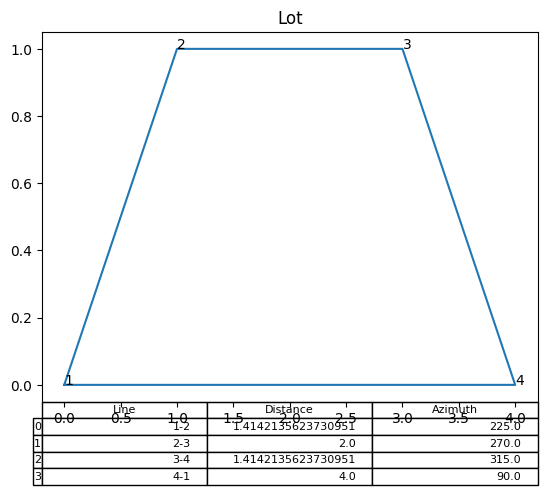

In [ ]:
# lot object
pointlist = [A, B, C, D] # assign corners
samplelot = Lot('Lot', pointlist) # create Lot object
print(samplelot) # printing Lot object
samplelot.Plot() # plot method invoked

  Line  Distance     Azimuth
0  1-2  3.000000  270.000000
1  2-3  4.000000  180.000000
2  3-4  3.605551   56.309932
3  4-5  2.828427   45.000000
4  5-1  2.000000  270.000000


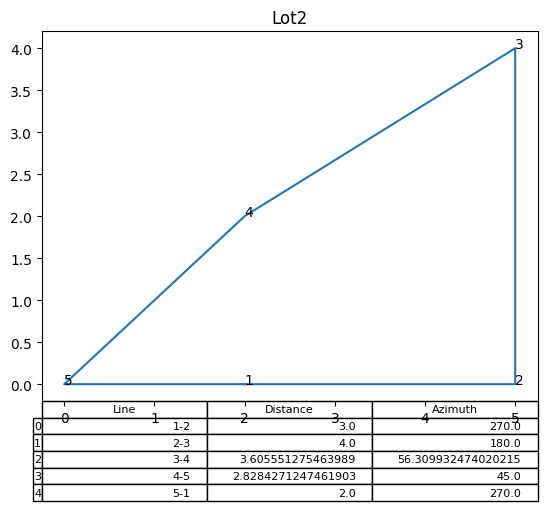

In [ ]:
q = Point(2,0)
w = Point(5,0)
e = Point(5, 4)
r = Point(2,2)
t = Point(0,0)

otherpointlist = [q, w, e, r, t]
samplelot2 = Lot('Lot2', otherpointlist)
print(samplelot2)
samplelot2.Plot()

  Line  Distance     Azimuth
0  1-2  4.123106  284.036243
1  2-3  4.123106  345.963757
2  3-4  4.123106   75.963757
3  4-5  4.123106   14.036243
4  5-6  4.123106  104.036243
5  6-7  4.123106  165.963757
6  7-8  4.123106  255.963757
7  8-1  4.123106  194.036243


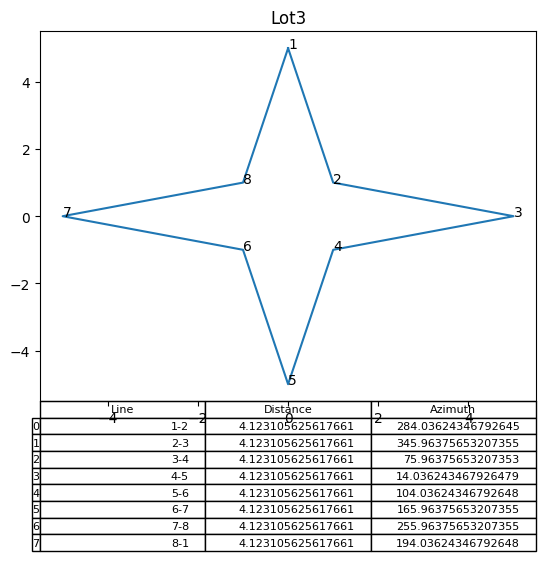

In [ ]:
a = Point(0,5)
s = Point(1,1)
d = Point(5,0)
f = Point(1,-1)
g = Point(0,-5)
h = Point(-1,-1)
j = Point(-5,0)
k = Point(-1,1)

otherotherpointlist = [a,s,d,f,g,h,j,k]
samplelot3 = Lot('Lot3', otherotherpointlist)
print(samplelot3)
samplelot3.Plot()